# AIN 214 - PA5 - 2023 on Clustering

This homework aims to deepen your understanding of clustering algorithms and introduce the concept of dimensionality reduction using Principal Component Analysis (PCA). You will use K-Means and Agglomerative Clustering, and explore the impact of PCA on these clustering techniques.



# Student Info
## Name Surname: Adam Sattout
## Student ID: b2220765061


## Dataset

We will use the Mall Customer Segmentation Data from Kaggle. The dataset is added to the homework folder - also accessible at [here](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/).
 

## 1. Data Cleaning

* **Objective**: Prepare your dataset for analysis.
* **Tasks**: Handle missing values, encode categorical features, handle outliers.

The steps for data cleaning may vary. I do not expect you to use a spefisific algorithm to handle outliers for example. But **show your work!**


In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#Load the dataset
path_to_dataset = 'Mall_Customers.csv'
df = pd.read_csv(path_to_dataset)

#Check for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [2]:
#Use mean imputation to handle outliers
for feature in df.columns:
    if feature != "CustomerID" and feature != 'Gender':
        mean_value = df[feature].mean()
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        outlier_mask = (df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))
        df.loc[outlier_mask, feature] = mean_value

#Encode categorical feature "Gender"       
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

## 2. Data Preprocessing

* **Objective**: Transform raw data into a format suitable for ML algorithms: PCA, and clustering, such as normalization.

In [3]:
columns_to_normalize = ['Age', 'Annual Income (k$)', 'Annual Income (k$)']  # List of columns to normalize
df = df.drop('CustomerID', axis=1)

scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

df_normalized.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,0.019231,0.000000,39.0
1,0,0.057692,0.000000,81.0
2,1,0.038462,0.009009,6.0
3,1,0.096154,0.009009,77.0
4,1,0.250000,0.018018,40.0


## 3. Dimensionality Reduction

### What is Dimensionality Reduction and Why is it Used?
Dimensionality reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It is an attempt to reduce the complexity of the task as an attempt to remove the curse of dimensionality - also for visualization purposes.

### 3.1. Principal Component Analysis (PCA)
PCA is a technique that transforms original correlated features into new uncorrelated features (principal components) based on variance.
**Process:**
* **Linear Combinations of Features:** PCA begins by creating linear combinations of the existing features in the dataset.
* **First Principal Component:** The first principal component (PC1) is the linear combination that captures the highest variance in the dataset. Mathematically, this is the direction in which the data varies the most.
* **Subsequent Principal Components:** Each following principal component is the linear combination of features that captures the highest variance possible while being orthogonal (perpendicular) to all previously determined principal components. This ensures that each new principal component adds unique information.
* **Covariance Matrix and Eigenvectors:** The process of finding these principal components corresponds to computing the eigenvectors of the covariance matrix of the data. The covariance matrix encapsulates how each pair of variables in the dataset co-varies.
* **Eigenvalues:** The eigenvalues associated with each eigenvector (principal component) indicate the amount of variance that the principal component explains. Larger eigenvalues mean more variance explained.





### 3.2. Apply PCA
* Normalize the data
* Apply PCA to the normalized data using scikit-learn
* Visualize the data with the first two principal components (PC) as the axes. Do you see any clusters?
* Components selection: Visualize the variance explained by each PC. Then choose the number of components that explain the data sufficiently enough.

**Simply use the PCA from sklearn library**

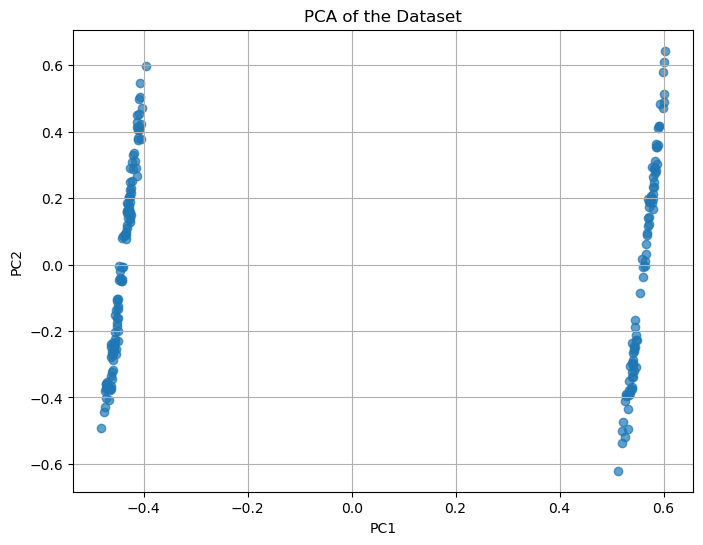

In [4]:
# Normalizing the data
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df)

# Applying PCA
pca = PCA()
df_pca = pca.fit_transform(df_normalized)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of the Dataset')
plt.grid(True)
plt.show()

We can see that there are either 2 or 4 clusters in our first two PCA components graph

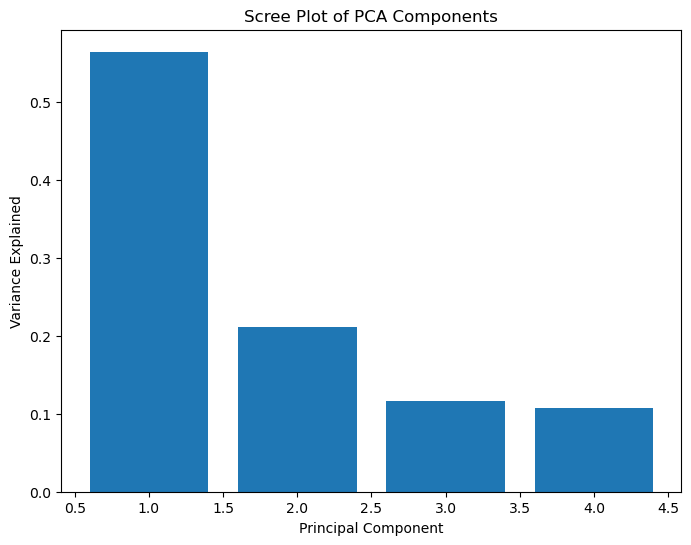

In [5]:
# Calculate explained variance
explained_variance = pca.explained_variance_ratio_

# Generate scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot of PCA Components')
plt.show()

We will use the first two components since in our screeplot we can see that both cover over 75% of variance. So using the 3rd might not be the best idea since it would make it harder to interpret our clusters and wouldnt make a big impact.

## 4. Clustering on the Original Dataset

### 4.1. K-Means Clustering on the Original Dataset

Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.

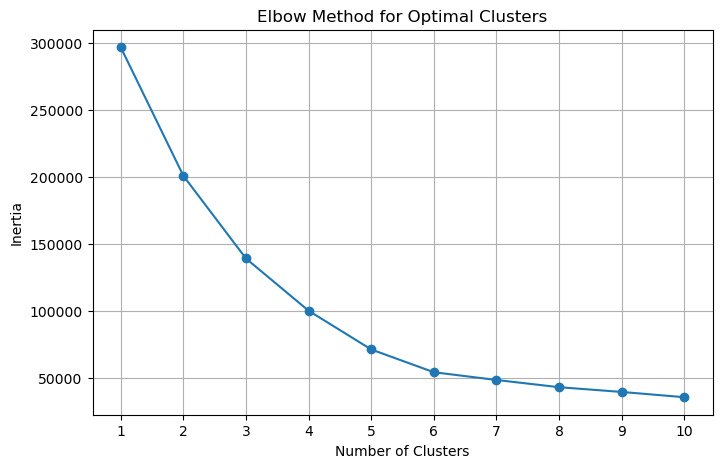

In [6]:
import warnings

#Ignore warnings
warnings.filterwarnings('ignore')

inertia = []
for i in range(1, 11):
    kmeans_original = KMeans(n_clusters=i, random_state=0)
    kmeans_original.fit(df)
    inertia.append(kmeans_original.inertia_)

# Plotting the Elbow Method Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


After checking for each k for original data, we would choose number of clusters to be 6 since after it we dont see a significent change in our inertia after it

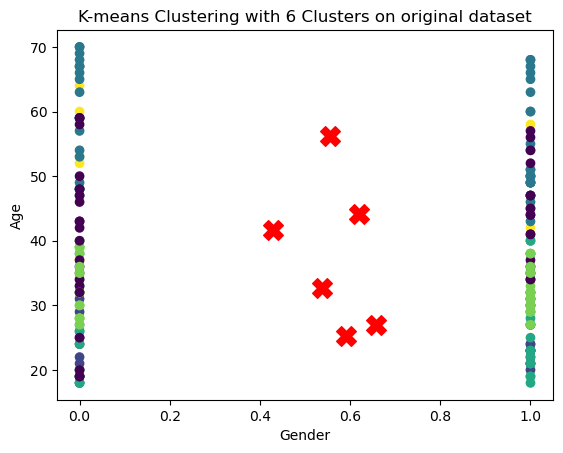

In [7]:
k = 6
kmeans_original = KMeans(n_clusters=k, random_state=42)
clusters_original = kmeans_original.fit_predict(df)

plt.scatter(df['Gender'], df['Age'], c=clusters_original, cmap='viridis')
plt.scatter(kmeans_original.cluster_centers_[:, 0], kmeans_original.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('K-means Clustering with 6 Clusters on original dataset')
plt.show()

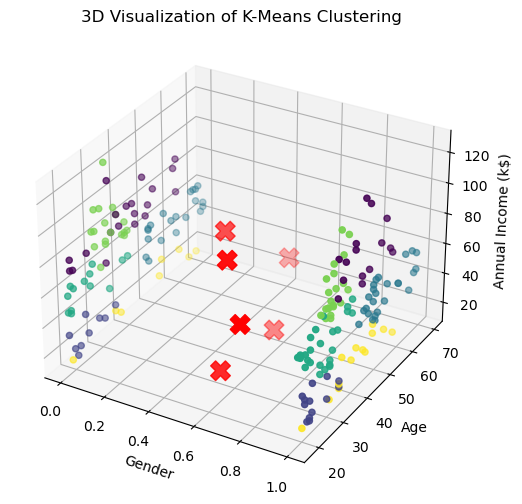

In [8]:
#Using 3d on 3 features
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gender'], df['Age'], df['Annual Income (k$)'], c=clusters_original, cmap='viridis')
ax.scatter(kmeans_original.cluster_centers_[:, 0],
           kmeans_original.cluster_centers_[:, 1],
           kmeans_original.cluster_centers_[:, 2], s=200, c='red', marker='X', label='Centroids')

ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('Annual Income (k$)')
plt.title('3D Visualization of K-Means Clustering')
plt.show()

As we can see, 3D shows a better connection considering all features, but it is still difficult to interpret and it will be even more complex with more dimensions.. We can try to normalize the data and then use PCA

### 4.2. Hierarchical Agglomerative Clustering (HAC) on the Original Dataset

Apply HAC on the dataset, visualize the dendogram. Then, comment on whether the dendogram agrees with the clusters obtained by K-Means. Try with 2 different linkage methods.

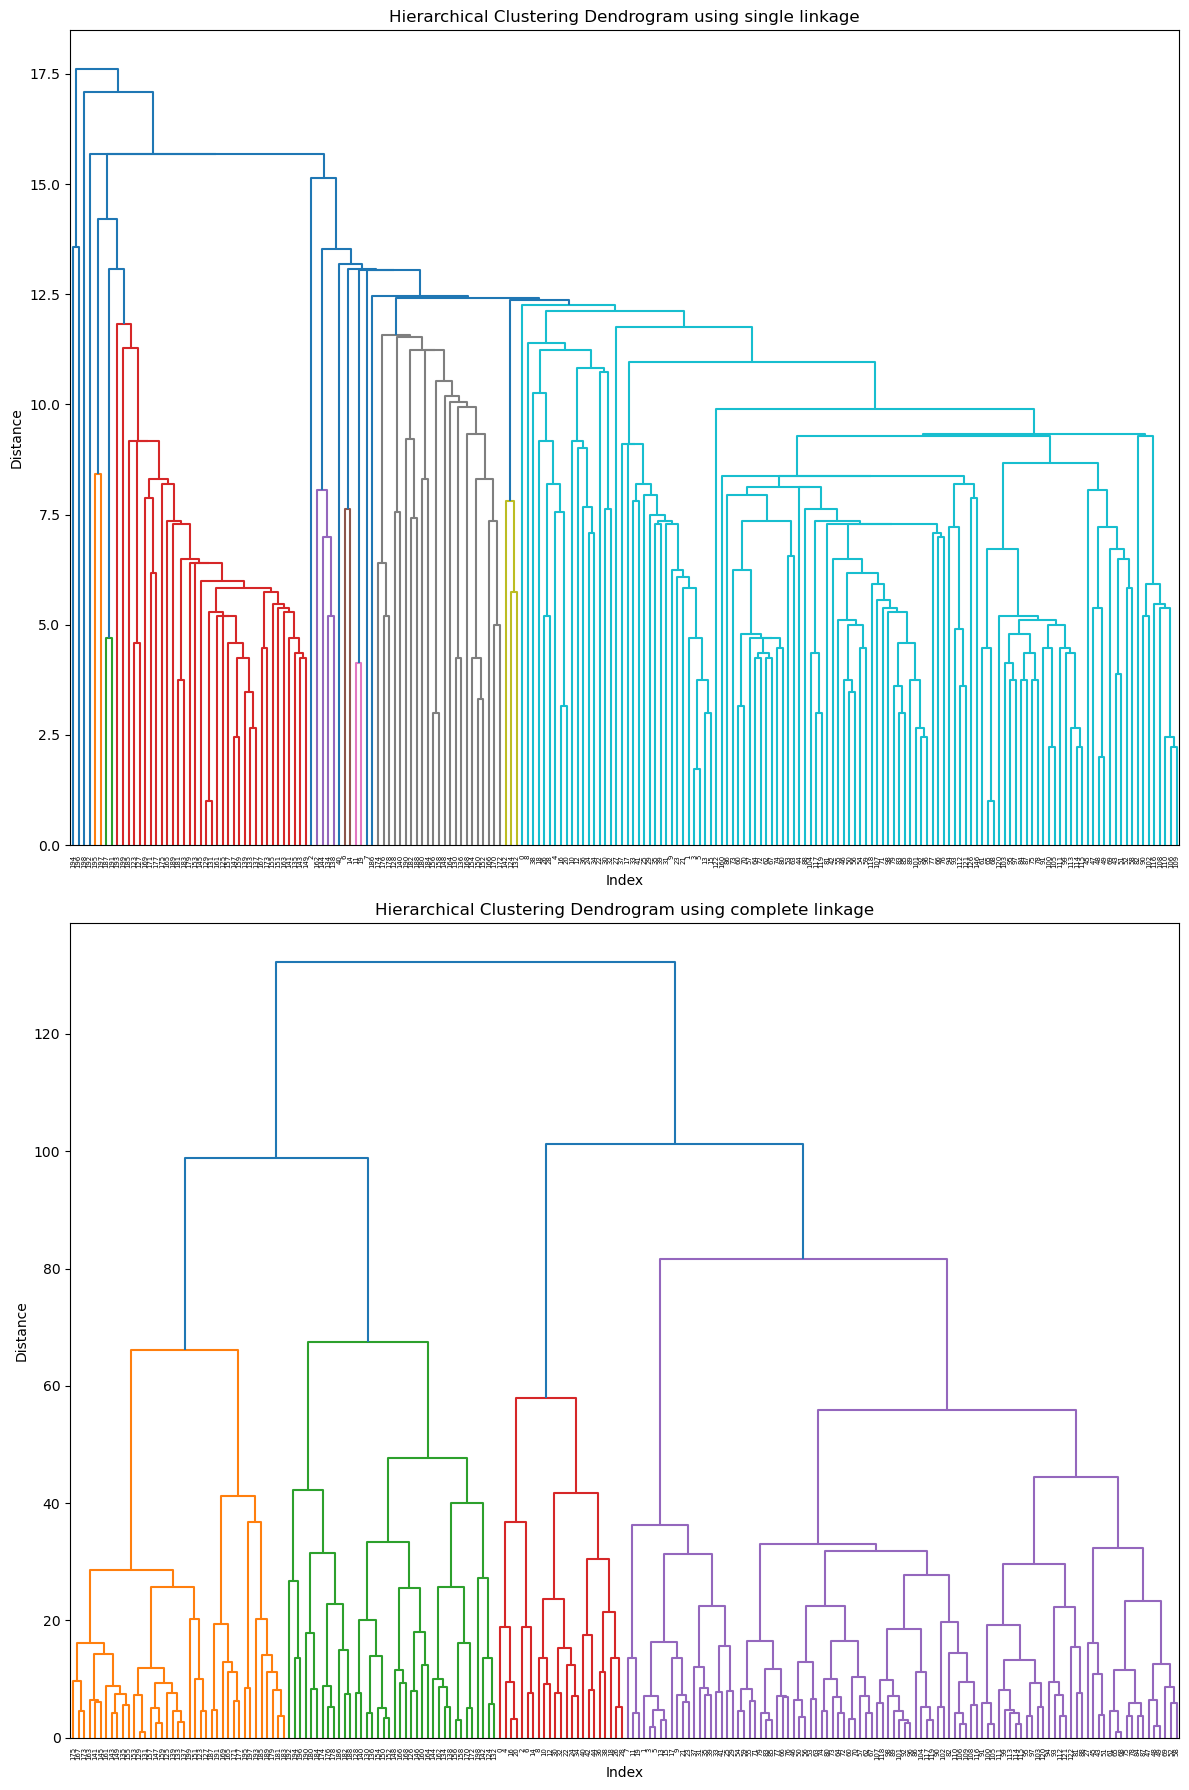

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

#Choose used linkages
linkage_methods = ['single', 'complete']

#Create the plots
fig, axes = plt.subplots(2, 1, figsize=(12, 18))

for i, method in enumerate(linkage_methods):
    #Generate the linkage matrix
    matrix = linkage(df, method=method)

    #Plot the dendrogram
    axes[i].set_title(f'Hierarchical Clustering Dendrogram using {method} linkage')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Distance')
    dendrogram(matrix, ax=axes[i])

plt.tight_layout()
plt.show()

When we compare HAC to previous KMeans, we can see how insane single linkage behaves with nearly 10 clusters which is way far off our cluster count 6, while complete linkage is at 4 clusters, which is also a bit far off than our original method, showing that the dendograms dont really agree with our KMeans method on the original dataset

Before applying PCA, we need to first normalize our data, the next part is going to show how clustering behaves on normalized data and why PCA is important to analyze these clusters.

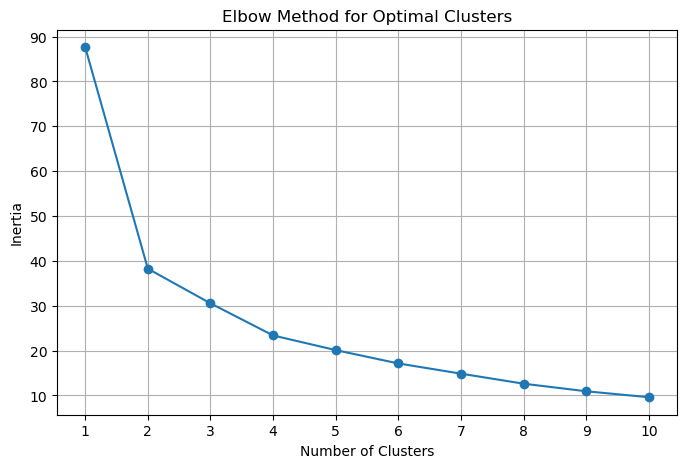

In [10]:
#Ignore warnings
warnings.filterwarnings('ignore')

#We are using normalized dataset to be able to compare features to each other more reliably
inertia = []
for i in range(1, 11):
    kmeans_normalized = KMeans(n_clusters=i, random_state=0)
    kmeans_normalized.fit(df_normalized)
    inertia.append(kmeans_normalized.inertia_)

# Plotting the Elbow Method Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

As we can see 4 seems to be the best number of clusters being the elbow of the graph

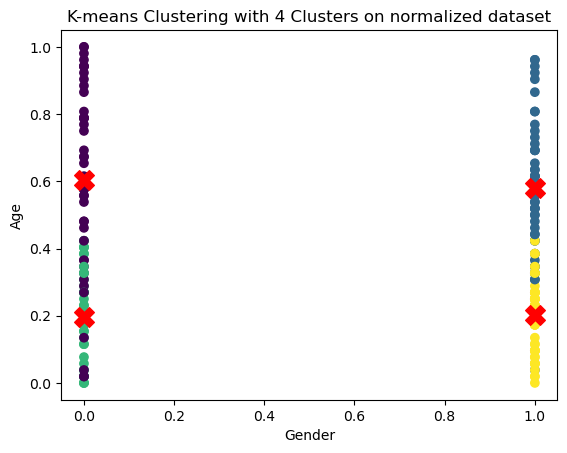

In [11]:
k = 4
kmeans_normalized = KMeans(n_clusters=k, random_state=42)
clusters_normalized = kmeans_normalized.fit_predict(df_normalized)

plt.scatter(df_normalized[:, 0], df_normalized[:, 1], c=clusters_normalized, cmap='viridis')
plt.scatter(kmeans_normalized.cluster_centers_[:, 0], kmeans_normalized.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('K-means Clustering with 4 Clusters on normalized dataset')
plt.show()

Although there isnt a visible barrier between clusters, It might seem okay to use this kind of clustering without using PCA if we only check on our clusters based on gender and age. However, if we take a look at the other features we will see that showing clusters in 2D for original data, while is much more interpretable, does a horrible job at showing clusters the data as shown below

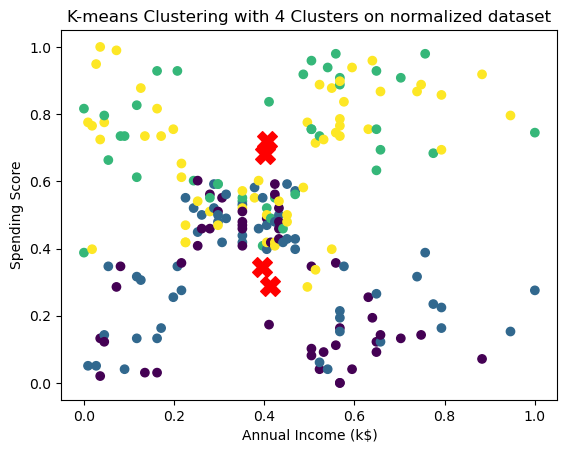

In [12]:
plt.scatter(df_normalized[:, 2], df_normalized[:, 3], c=clusters_normalized, cmap='viridis')
plt.scatter(kmeans_normalized.cluster_centers_[:, 2], kmeans_normalized.cluster_centers_[:, 3], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('K-means Clustering with 4 Clusters on normalized dataset')
plt.show()

Based on this, we need to use more dimensions to show clusters in our dataset

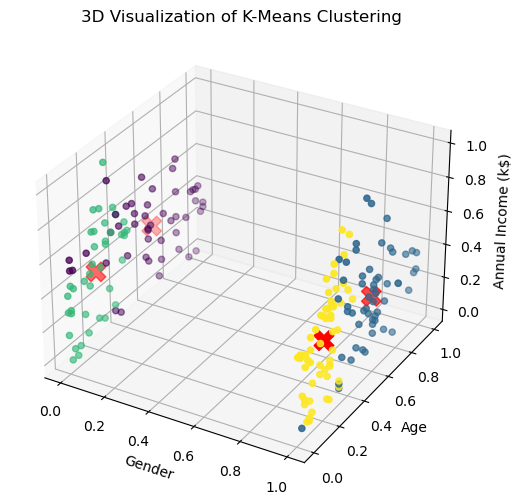

In [13]:
#Using 3d on 3 features
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_normalized[:, 0], df_normalized[:, 1], df_normalized[:, 2], c=clusters_normalized, cmap='viridis')
ax.scatter(kmeans_normalized.cluster_centers_[:, 0],
           kmeans_normalized.cluster_centers_[:, 1],
           kmeans_normalized.cluster_centers_[:, 2], s=200, c='red', marker='X', label='Centroids')

ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('Annual Income (k$)')
plt.title('3D Visualization of K-Means Clustering')
plt.show()

This seems well-clustered, but it doesn't take Spending Score into consideration. To do so we need to make it more complex and use a 4th dimension

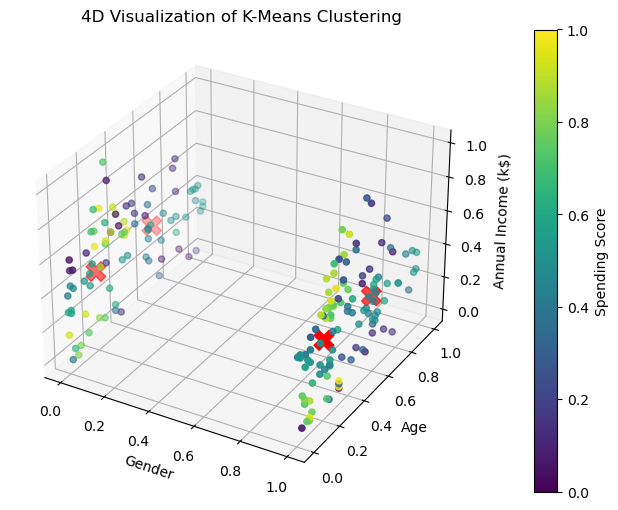

In [14]:
#Using 4d on all features
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_normalized[:, 0], df_normalized[:, 1], df_normalized[:, 2], c=df_normalized[:, 3], cmap='viridis')
ax.scatter(kmeans_normalized.cluster_centers_[:, 0],
           kmeans_normalized.cluster_centers_[:, 1],
           kmeans_normalized.cluster_centers_[:, 2],
           kmeans_normalized.cluster_centers_[:, 3], s=200, c='red', marker='X', label='Centroids')

ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('Annual Income (k$)')

plt.colorbar(sc, ax=ax, label='Spending Score', pad = 0.1)
plt.title('4D Visualization of K-Means Clustering')
plt.show()

With more dimensions we consider, interpretting the graph we get becomes more absurd and unrealistic, so we use PCA to reduce the dimensions while considering all features

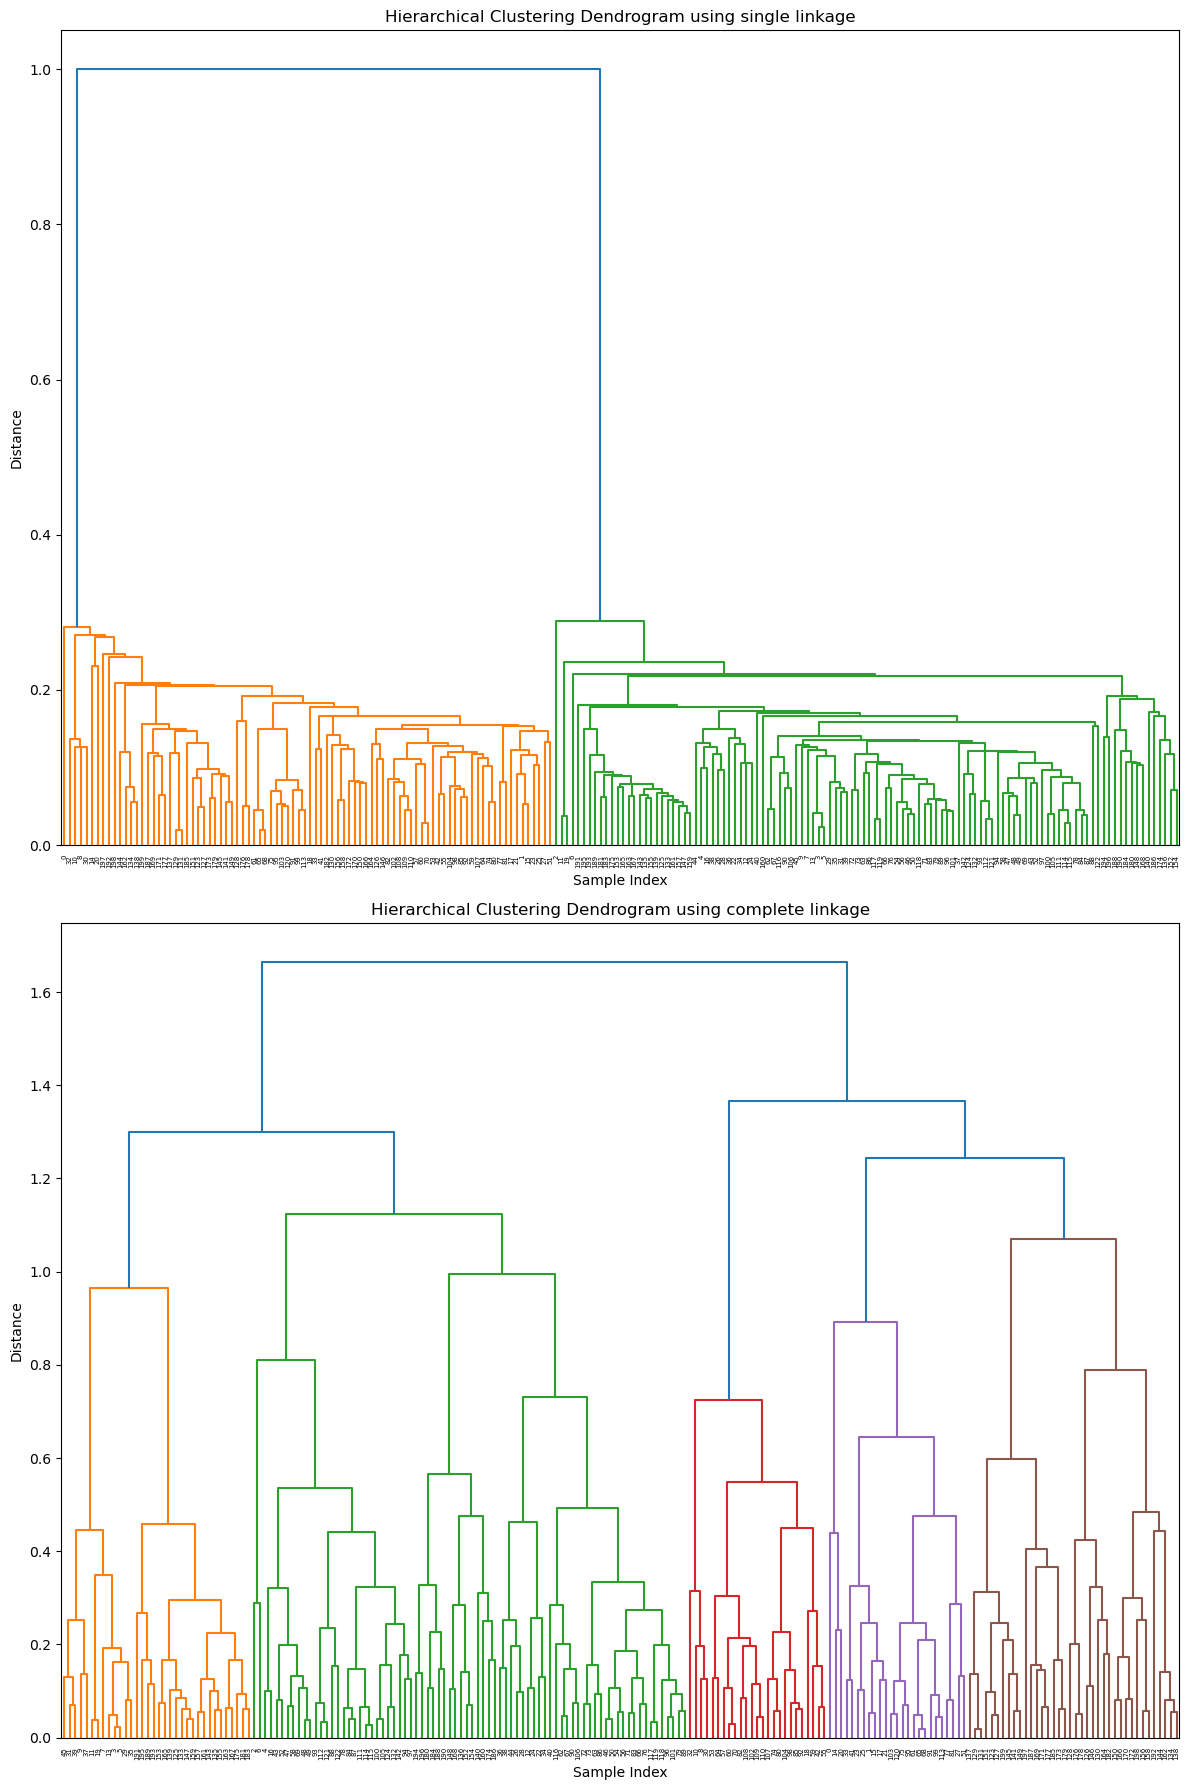

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

#Choose used linkages
linkage_methods = ['single', 'complete']

#Create the plots
fig, axes = plt.subplots(2, 1, figsize=(12, 18))

for i, method in enumerate(linkage_methods):
    #Generate the linkage matrix
    Z = linkage(df_normalized, method=method)

    #Plot the dendrogram
    axes[i].set_title(f'Hierarchical Clustering Dendrogram using {method} linkage')
    axes[i].set_xlabel('Sample Index')
    axes[i].set_ylabel('Distance')
    dendrogram(Z, ax=axes[i])

plt.tight_layout()
plt.show()

Before we proceed to PCA, we can see here that HAC is closer to our expectations than when using original dataset. both methods provide a similar distinction of our points to that of PCA, we saw before that we can divide our data to 2 or 4 clusters and here average linkage divides it to 2, while complete divides it to 5

## 5. K-means Clustering with PCA

Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.

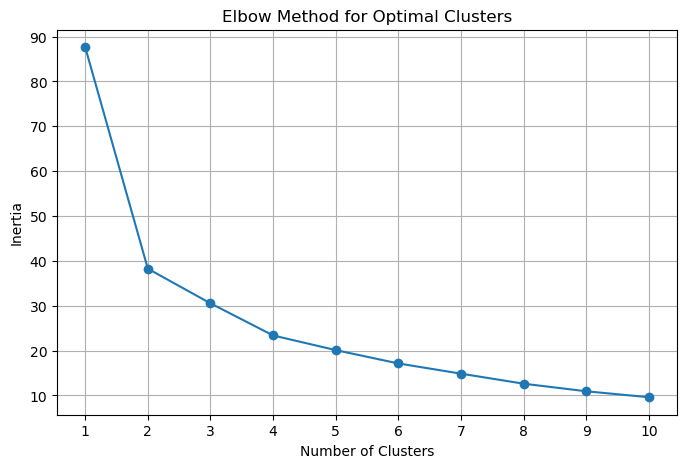

In [16]:
#Ignore warnings
warnings.filterwarnings('ignore')

pca = PCA()
df_pca = pca.fit_transform(df_normalized)

inertia = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, random_state=0)
    kmeans_pca.fit(df_pca)
    inertia.append(kmeans_pca.inertia_)

# Plotting the Elbow Method Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Here we see exactly the same plot of the normalized dataset since it gives the same results so we will again choose 4 clusters for the same reason

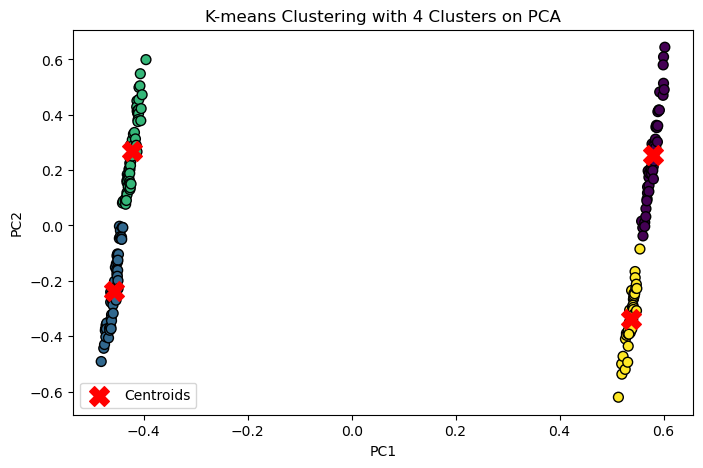

In [17]:
kmeans_pca = KMeans(n_clusters=4, random_state=0)
clusters_pca = kmeans_pca.fit_predict(df_pca)

# Visualizing the clusters
plt.figure(figsize=(8, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters_pca, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering with 4 Clusters on PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

So as a result of using PCA we obtain a much clearer distinction of our 4 clusters taking into account all meaningful features represented in 2D

## 6. Evaluate the Clustering Results

* Evaluate and compare the clustering results obtained in 4.1 and 5 (k means with and without PCA) using the Silhouette Coefficients.
* Which is better?

In [18]:
from sklearn.metrics import silhouette_score

silhouette_original = silhouette_score(df, clusters_original)
silhouette_normalized = silhouette_score(df_normalized, clusters_normalized)
silhouette_pca = silhouette_score(df_pca, clusters_pca)

print("Silhouette Coefficient for K-Means on original dataset:", silhouette_original)
print("Silhouette Coefficient for K-Means on normalized dataset:", silhouette_normalized)
print("Silhouette Coefficient for K-Means on PCA-transformed dataset:", silhouette_pca)

Silhouette Coefficient for K-Means on original dataset: 0.45544678922248577
Silhouette Coefficient for K-Means on normalized dataset: 0.3559176053385266
Silhouette Coefficient for K-Means on PCA-transformed dataset: 0.3559176053385265


In our final results, we see that both normalized and PCA-transformed scores are approximately identical, which tells us that PCA is only a way of simplifying the data we have to be more comprehensible. We can also see that the original dataset has a better silhouette score than the normalized dataset, this could be due to feature relevance not being the same across all the dataset, so gender might be less effective on the result of including a point to a cluster than some other feature like age or income. This can be seen in PCA where all clusters are around either 0 or 1 on PC1, making gender a main factor of clustering, which appeared to have a negative impact on our results 